In [1]:
import pandas as pd
og_data = pd.read_csv('Housing_Data_.csv')
data = og_data

In [2]:
pd.set_option('display.max_columns', None)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Location
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Urban
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Urban
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Suburban
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Urban
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Suburban


* The data columns
  
id – A unique identifier for each house.

date – The date when the house was sold.

price – The sale price of the house (target variable).

bedrooms – The number of bedrooms in the house.

bathrooms – The number of bathrooms (including partial ones).

sqft_living – The total square footage of the interior living space.

sqft_lot – The total square footage of the land.

floors – The number of floors in the house.

waterfront – A binary value (0 = No, 1 = Yes) indicating if the house is near a waterfront.

view – A rating (0–4) that represents how good the view is.

condition – The overall condition of the house (1–5, with 5 being best).

grade – The quality of construction and design (graded from 1 to 13).

sqft_above – The square footage of the house excluding the basement.

sqft_basement – The square footage of the basement area.

yr_built – The year the house was originally built.

yr_renovated – The year the house was last renovated (0 if never renovated).

zipcode – The ZIP code of the house location.

lat – The latitude coordinate of the house.

long – The longitude coordinate of the house.

sqft_living15 – The average living space (sqft) of the 15 nearest houses.

sqft_lot15 – The average lot size (sqft) of the 15 nearest houses.

Location – Likely represents the area or neighborhood where the house is located.

In [3]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Location         0
dtype: int64

So there are no NaN values

In [4]:
data.drop_duplicates(inplace=True)

In [5]:
data.shape

(21613, 22)

In [6]:
cols = data.columns
cols

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Location'],
      dtype='object')

In [7]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
Location          object
dtype: object

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_cols = data.select_dtypes(include=[np.number]).columns
drop_cols = ['id', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'waterfront', 'view', 'condition', 'grade', 'floors', 'bedrooms', 'bathrooms']
num_cols = num_cols.drop(drop_cols, errors='ignore')
num_cols

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

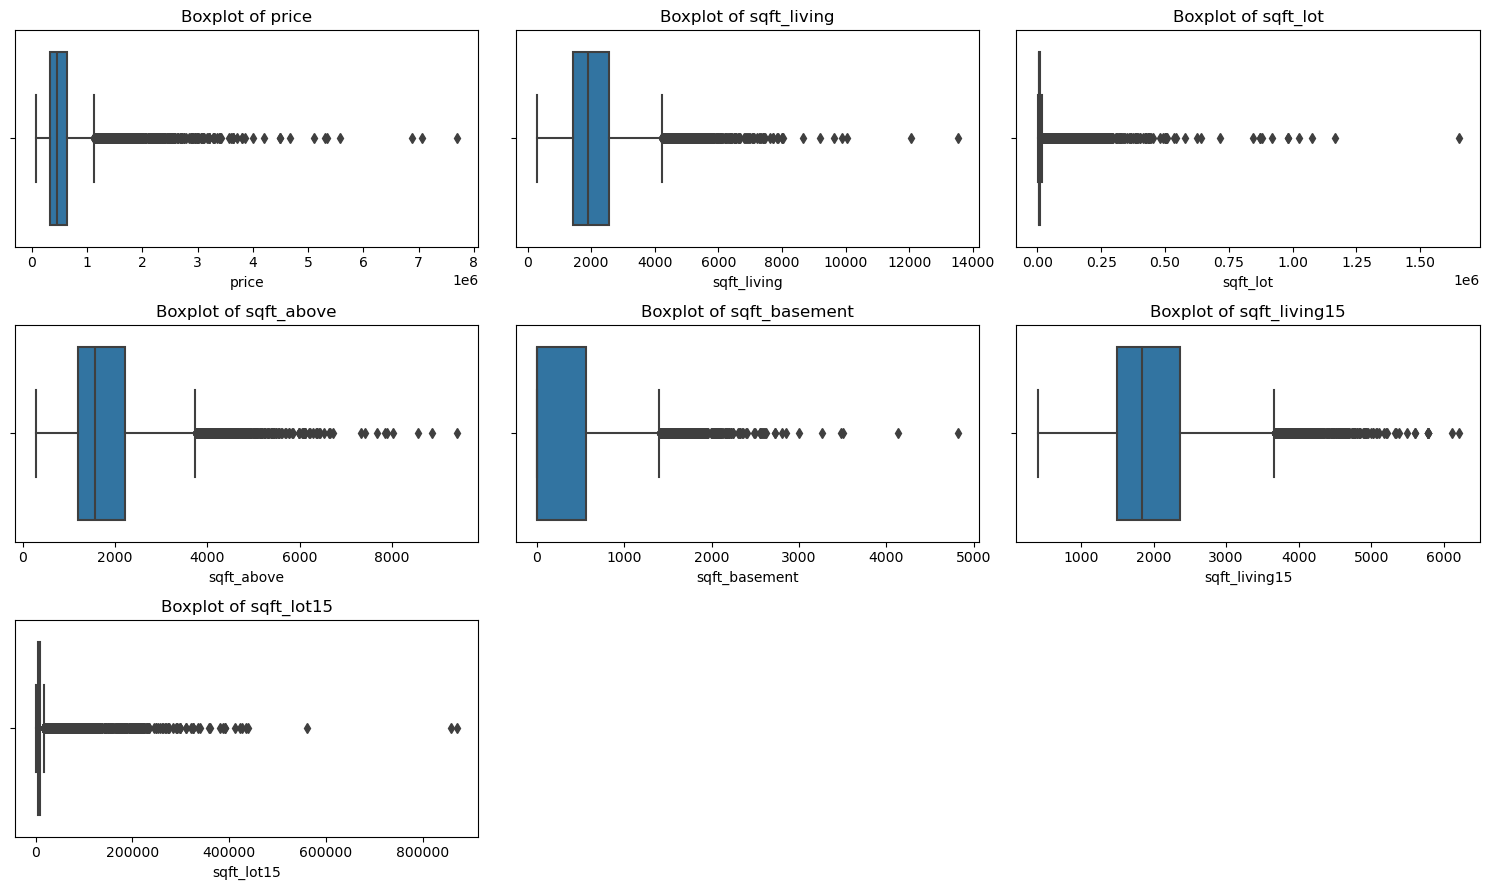

In [9]:
%matplotlib inline
num_plots = len(num_cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)  

plt.figure(figsize=(15, rows * 3))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i) 
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [10]:
import warnings
warnings.filterwarnings('ignore')

Now we are trying to remove the outliers in the data for specific features

Original dataset size: (21613, 22)
Cleaned dataset size: (16654, 22)


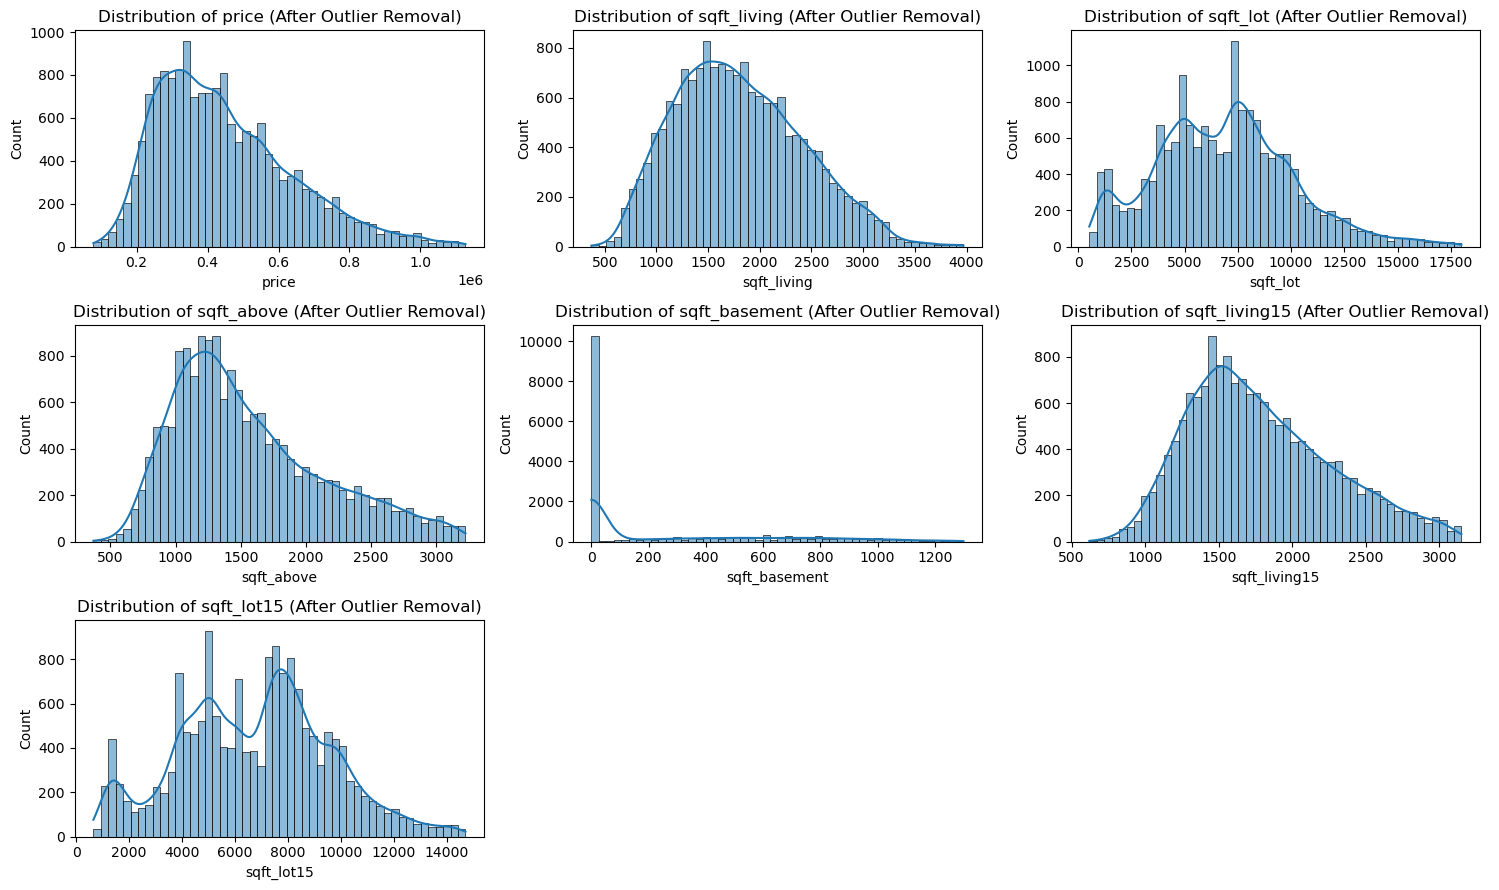

In [11]:
def remove_outliers(data, columns, threshold=1.5):
    data_clean = data.copy()
    for col in columns:
        Q1 = data_clean[col].quantile(0.25)
        Q3 = data_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data_clean = data_clean[(data_clean[col] >= lower_bound) & (data_clean[col] <= upper_bound)]
    return data_clean

data_cleaned = remove_outliers(data, num_cols)

print(f"Original dataset size: {data.shape}")
print(f"Cleaned dataset size: {data_cleaned.shape}")

num_plots = len(num_cols)
cols = 3  
rows = int(np.ceil(num_plots / cols))  

plt.figure(figsize=(15, rows * 3))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data_cleaned[col], bins=50, kde=True)
    plt.title(f"Distribution of {col} (After Outlier Removal)")

plt.tight_layout()
plt.show()

We got outlier removed data

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder

cat_cols = data_cleaned.select_dtypes(include=[object, "category"]).columns.tolist()
print(f'Num cols are {num_cols}')
print(f'Cat cols are {cat_cols}')

scaler = MinMaxScaler()
data_cleaned[num_cols] = scaler.fit_transform(data_cleaned[num_cols])

if "Location" in cat_cols:
    data_cleaned = pd.get_dummies(data_cleaned, columns=["Location"], drop_first=True)


ordinal_cols = [] 
label_enc = LabelEncoder()

for col in ordinal_cols:
    data_cleaned[col] = label_enc.fit_transform(data_cleaned[col])

data_cleaned.head()

Num cols are Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
Cat cols are ['date', 'Location']


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Location_Suburban,Location_Urban
0,7229300521,20141013T000000,0.146139,2,1.00,0.225000,0.293478,1.0,0,0,3,7,0.283912,0.000000,1955,0,98178,47.5112,-122.257,0.284585,0.355826,False,True
1,6414100192,20141209T000000,0.438513,3,2.25,0.611111,0.384554,2.0,0,0,3,7,0.630915,0.307692,1951,1991,98125,47.7210,-122.319,0.422925,0.497402,False,True
2,5631500400,20150225T000000,0.097235,2,1.00,0.111111,0.542334,1.0,0,0,3,6,0.140203,0.000000,1933,0,98028,47.7379,-122.233,0.830040,0.527511,True,False
3,2487200875,20141209T000000,0.501430,4,3.00,0.441667,0.256293,1.0,0,0,5,7,0.238346,0.700000,1965,0,98136,47.5208,-122.393,0.292490,0.309559,False,True
4,1954400510,20150218T000000,0.411821,3,2.00,0.363889,0.432494,1.0,0,0,3,8,0.459166,0.000000,1987,0,98074,47.6168,-122.045,0.466403,0.487722,True,False


In [13]:
data_cleaned = data_cleaned.drop(columns=['id', 'date', 'zipcode', 'lat', 'long'])

In [14]:
data_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,Location_Suburban,Location_Urban
0,0.146139,2,1.00,0.225000,0.293478,1.0,0,0,3,7,0.283912,0.000000,1955,0,0.284585,0.355826,False,True
1,0.438513,3,2.25,0.611111,0.384554,2.0,0,0,3,7,0.630915,0.307692,1951,1991,0.422925,0.497402,False,True
2,0.097235,2,1.00,0.111111,0.542334,1.0,0,0,3,6,0.140203,0.000000,1933,0,0.830040,0.527511,True,False
3,0.501430,4,3.00,0.441667,0.256293,1.0,0,0,5,7,0.238346,0.700000,1965,0,0.292490,0.309559,False,True
4,0.411821,3,2.00,0.363889,0.432494,1.0,0,0,3,8,0.459166,0.000000,1987,0,0.466403,0.487722,True,False


Now i am modifying the yr_built feature, cause it may be a factor for the price prediction

In [15]:
bins = [1900, 1950, 2000, 2020] 
labels = ["Old", "Mid-Age", "New"]
data_cleaned["house_age_category"] = pd.cut(data_cleaned["yr_built"], bins=bins, labels=labels)

data_cleaned = pd.get_dummies(data_cleaned, columns=["house_age_category"], drop_first=True)

data_cleaned.drop(columns=["yr_built"], inplace=True)


In [16]:
data_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,Location_Suburban,Location_Urban,house_age_category_Mid-Age,house_age_category_New
0,0.146139,2,1.00,0.225000,0.293478,1.0,0,0,3,7,0.283912,0.000000,0,0.284585,0.355826,False,True,True,False
1,0.438513,3,2.25,0.611111,0.384554,2.0,0,0,3,7,0.630915,0.307692,1991,0.422925,0.497402,False,True,True,False
2,0.097235,2,1.00,0.111111,0.542334,1.0,0,0,3,6,0.140203,0.000000,0,0.830040,0.527511,True,False,False,False
3,0.501430,4,3.00,0.441667,0.256293,1.0,0,0,5,7,0.238346,0.700000,0,0.292490,0.309559,False,True,True,False
4,0.411821,3,2.00,0.363889,0.432494,1.0,0,0,3,8,0.459166,0.000000,0,0.466403,0.487722,True,False,True,False


In [17]:
data_cleaned["renovated"] = (data_cleaned["yr_renovated"] != 0).astype(int)

data_cleaned.drop(columns=["yr_renovated"], inplace=True)

In [18]:
data_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Location_Suburban,Location_Urban,house_age_category_Mid-Age,house_age_category_New,renovated
0,0.146139,2,1.00,0.225000,0.293478,1.0,0,0,3,7,0.283912,0.000000,0.284585,0.355826,False,True,True,False,0
1,0.438513,3,2.25,0.611111,0.384554,2.0,0,0,3,7,0.630915,0.307692,0.422925,0.497402,False,True,True,False,1
2,0.097235,2,1.00,0.111111,0.542334,1.0,0,0,3,6,0.140203,0.000000,0.830040,0.527511,True,False,False,False,0
3,0.501430,4,3.00,0.441667,0.256293,1.0,0,0,5,7,0.238346,0.700000,0.292490,0.309559,False,True,True,False,0
4,0.411821,3,2.00,0.363889,0.432494,1.0,0,0,3,8,0.459166,0.000000,0.466403,0.487722,True,False,True,False,0


Let's see the correlation between the features

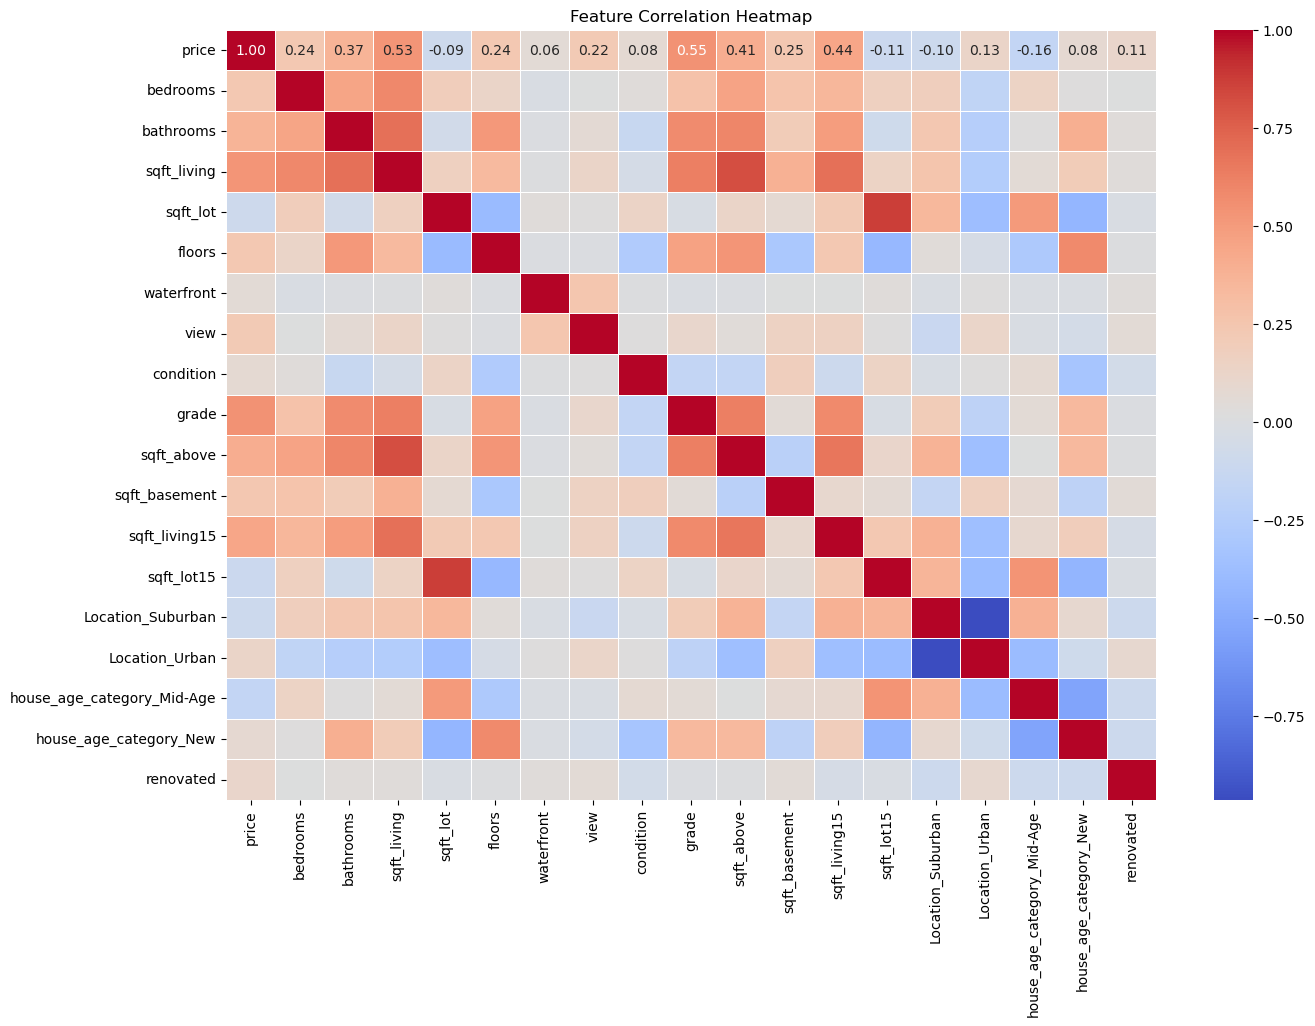

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data_cleaned.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.4)
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
low_impact_features = correlation_matrix["price"].abs().sort_values().head(5)
print("Low-impact predictors:\n", low_impact_features)

Low-impact predictors:
 waterfront                0.058344
condition                 0.079382
house_age_category_New    0.080732
sqft_lot                  0.089046
Location_Suburban         0.100421
Name: price, dtype: float64


In [21]:
from sklearn.model_selection import train_test_split

X = data_cleaned.drop(columns=["price"]) 
y = data_cleaned["price"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")

Training Set: (13323, 18), Test Set: (3331, 18)


In [22]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

importances = dict(zip(X.columns, rf_model.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
print("Feature Importances:", sorted_importances)

Feature Importances: [('grade', 0.28119216331164393), ('sqft_lot15', 0.1310120499341806), ('sqft_living', 0.1226751417158517), ('sqft_living15', 0.11544014053604476), ('sqft_lot', 0.07345623549055551), ('sqft_above', 0.05630401164651813), ('Location_Urban', 0.0472607942463068), ('sqft_basement', 0.03526419373909926), ('bathrooms', 0.027165486285666417), ('condition', 0.02420581527096965), ('bedrooms', 0.017684209856343145), ('house_age_category_Mid-Age', 0.017146176331287528), ('house_age_category_New', 0.014572787520309483), ('view', 0.013488901340653236), ('floors', 0.009695850536790944), ('renovated', 0.006843785808593993), ('Location_Suburban', 0.005264866727508026), ('waterfront', 0.0013273897016769112)]


* How features like Size or Number of Rooms correlate with house prices

price                         1.000000
grade                         0.546274
sqft_living                   0.528599
sqft_living15                 0.440360
sqft_above                    0.405792
bathrooms                     0.366951
sqft_basement                 0.247364
floors                        0.239769
bedrooms                      0.235563
view                          0.222537
Location_Urban                0.126567
renovated                     0.113283
house_age_category_New        0.080732
condition                     0.079382
waterfront                    0.058344
sqft_lot                     -0.089046
Location_Suburban            -0.100421
sqft_lot15                   -0.107424
house_age_category_Mid-Age   -0.158938
Name: price, dtype: float64


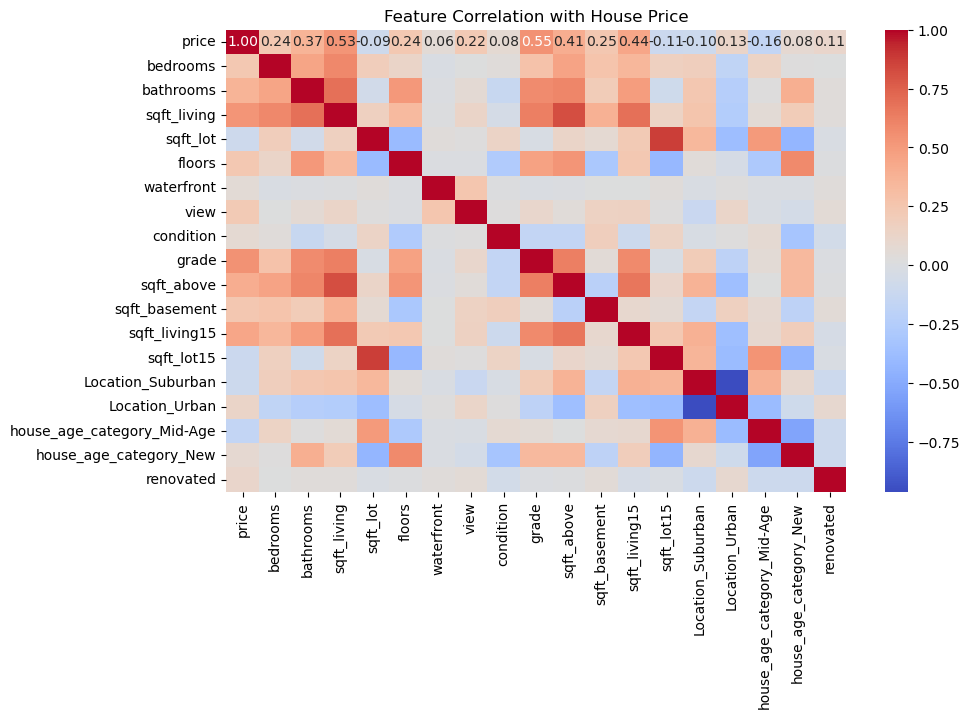

In [24]:
correlation_matrix = data_cleaned.corr()

print(correlation_matrix["price"].sort_values(ascending=False))

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation with House Price")
plt.show()

* The effect of Location on pricing.

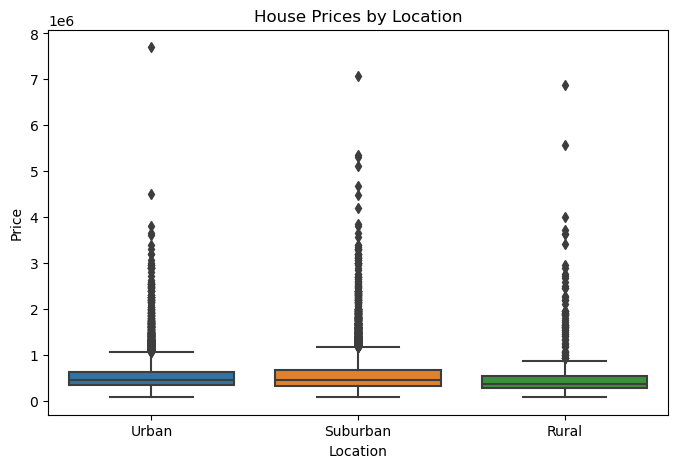

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=og_data["Location"], y=og_data["price"])
plt.title("House Prices by Location")
plt.xlabel("Location")
plt.ylabel("Price")
plt.show()

* Accuracy and reliability of the regression model for predicting real-world house prices.

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.2f}")

Random Forest RMSE: 0.11
Random Forest R² Score: 0.61
